[Text(0.5, 1.0, 'Count of Data')]

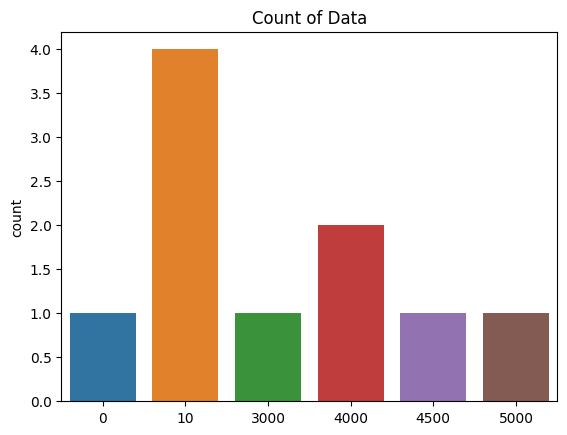

In [1]:
import seaborn as sns

data = [0, 10, 10, 10, 4000, 3000, 4000, 5000, 10, 4500]
ax = sns.countplot(x=data)
ax.set(title="Count of Data")

here


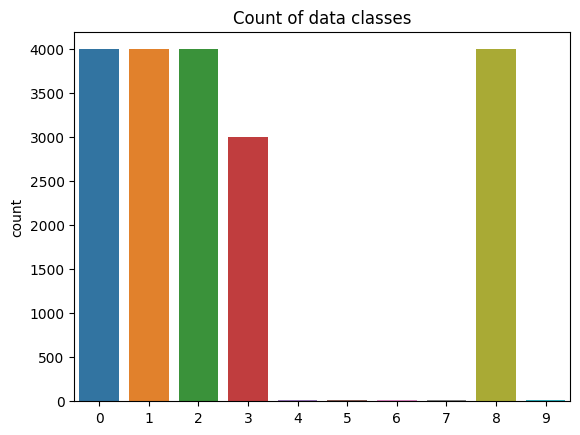

In [2]:
import flwr as fl
import tensorflow as tf
from tensorflow import keras
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# AUxillary methods
def getDist(y):
    ax = sns.countplot(x=y)
    ax.set(title="Count of data classes")
    plt.show()

def getData(dist, x, y):
    dx = []
    dy = []
    counts = [0 for i in range(10)]
    for i in range(len(x)):
        if counts[y[i]]<dist[y[i]]:
            dx.append(x[i])
            dy.append(y[i])
            counts[y[i]] += 1
        
    return np.array(dx), np.array(dy)



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
dist = [4000, 4000, 4000, 3000, 10, 10, 10, 10, 4000, 10]
x_train, y_train = getData(dist, x_train, y_train)
print("here")
getDist(y_train)

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3212 - accuracy: 0.0906


[2.3211967945098877, 0.09059999883174896]